<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Analyzing_data_in_the_JARVIS_DFT_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of contents

1. Loading JARVIS-DFT 3D and 2D json from figshare
2. Making pandas dataframe,
3. Properties available, keys
4. Histogram of properties
5. Compare bandgaps from different DFT methods, OptB88vdW, TBmBJ
6. Multi-property filter for 3D material-screenig example
7. Example: find all cubic materials
8. Exfoliation energy distribution for 2D materials
9. Multi-property filter for 2D dataset

In [1]:
!pip install -q jarvis-tools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 24.7 MB/s eta 0:00:00


### Find more details about JARVIS-DFT data in: https://www.nature.com/articles/s41524-020-00440-1 and https://pubs.aip.org/aip/apr/article/10/4/041302/2917416

### List of similar databases are available at https://pages.nist.gov/jarvis/databases/

### We have prepared a basic json file with meta-data associated with JARVIS-DFT. So, first let's import jarvis-dft metadata from the figshre repository. This has been built as a module in the jarvis-tools


In [2]:
# !pip install jarvis-tools, and restart runtime in the notebook if you haven't installed it yet
from jarvis.db.figshare import data

dft_3d = data('dft_3d')
dft_2d = data('dft_2d')

Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699


100%|██████████| 40.8M/40.8M [00:01<00:00, 21.1MiB/s]


Loading the zipfile...
Loading completed.
Obtaining 2D dataset 1.1k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815705


100%|██████████| 8.39M/8.39M [00:00<00:00, 10.9MiB/s]


Loading the zipfile...
Loading completed.


In [3]:
# data-size
print (len(dft_3d),len(dft_2d))

75993 1103


In [4]:
# let's make a pandas dataframe from the figshare json file
# pip install pandas, if you haven't installed yet
import pandas as pd
import numpy as np

df=pd.DataFrame(dft_3d)

In [5]:
# Keys in the json file
print (df.columns, len(df.columns))

Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'Tc_supercon', 'dimensionality',
       'efg', 'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys',
       'density', 'poisson', 'raw_files', 'nat', 'bulk_modulus_kv',
       'shear_modulus_gv', 'mbj_bandgap', 'hse_ga

# Count number of entries for each property

In [6]:
for i in df.columns.values:
  val=df[i].replace('na',np.nan).dropna().values
  print(i,len(val))

jid 75993
spg_number 75993
spg_symbol 75993
formula 75993
formation_energy_peratom 75993
func 75993
optb88vdw_bandgap 75993
atoms 75993
slme 9770
magmom_oszicar 71320
spillage 11377
elastic_tensor 25513
effective_masses_300K 75993


<ipython-input-6-f8dd14d7e699>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val=df[i].replace('na',np.nan).dropna().values


kpoint_length_unit 75671
maxdiff_mesh 5861
maxdiff_bz 5861
encut 75670
optb88vdw_total_energy 75993
epsx 52168
epsy 52168
epsz 52168
mepsx 18293
mepsy 18293
mepsz 18293
modes 13910
magmom_outcar 74261
max_efg 11871
avg_elec_mass 17645
avg_hole_mass 17645
icsd 75993
dfpt_piezo_max_eij 4799
dfpt_piezo_max_dij 3347
dfpt_piezo_max_dielectric 4706
dfpt_piezo_max_dielectric_electronic 4809
dfpt_piezo_max_dielectric_ionic 4809
max_ir_mode 4805
min_ir_mode 4809
n-Seebeck 23218
p-Seebeck 23218
n-powerfact 23218
p-powerfact 23218
ncond 23218
pcond 23218
nkappa 23218
pkappa 23218
ehull 75993
Tc_supercon 1058
dimensionality 75560
efg 75993
xml_data_link 75993
typ 75993
exfoliation_energy 813
spg 75993
crys 75993
density 75993
poisson 23597
raw_files 75993
nat 75993
bulk_modulus_kv 23824
shear_modulus_gv 23824
mbj_bandgap 19805
hse_gap 56
reference 75993
search 75993


#Filter dataset based on a set of elements

In [7]:
from jarvis.core.atoms import Atoms
def has_elements(atoms_dict = {}, my_element = ['Al','O']):
    atoms = Atoms.from_dict(atoms_dict)
    elements = atoms.elements
    if set(my_element)==set(elements):
        return True
    else:
        return np.nan

df['el'] = df['atoms'].apply(lambda x: has_elements(atoms_dict = x, my_element = ['Al','O']))
df1 = df.dropna()
# Exercise 1: Check if you get similar number on https://jarvis.nist.gov/jarvisdft/
# Exercise 2: Filter for ['Bi','Te'] instead with spacegroup 166(R-3m)
print ('#entries:',len(df1))
df1

#entries: 35


,jid,spg_number,spg_symbol,formula,formation_energy_peratom,func,optb88vdw_bandgap,atoms,slme,magmom_oszicar,...,poisson,raw_files,nat,bulk_modulus_kv,shear_modulus_gv,mbj_bandgap,hse_gap,reference,search,el
596,JVASP-49837,14,P2_1/c,Al2O3,-3.20783,OptB88vdW,4.737,"{'lattice_mat': [[0.0, 5.39691339770191, 0.002...",0.0,0.0,...,0.28,"[FD-ELAST,JVASP-49837.zip,https://ndownloader....",20,125.3,63.42,6.341,na,mp-754531,-Al-O,True
1175,JVASP-32,167,R-3c,Al2O3,-3.31332,OptB88vdW,6.430,"{'lattice_mat': [[4.253255599774612, -0.001134...",0.0,0.0,...,0.24,"[FD-ELAST,JVASP-32.zip,https://ndownloader.fig...",10,241.28,156.49,7.571,na,mp-1143,-Al-O,True
3564,JVASP-85600,10,P2/m,Al2O3,-2.58725,OptB88vdW,1.213,"{'lattice_mat': [[2.8596378307239485, -0.03240...",9.11,0.0,...,0.22,"[OPT-LOPTICS,JVASP-85600.zip,https://ndownload...",10,78.38,58.69,2.686,na,mp-638765,-Al-O,True
6073,JVASP-18899,221,Pm-3m,AlO3,-1.26344,OptB88vdW,0.000,"{'lattice_mat': [[5.226587060029207, -0.221462...",na,6.0,...,na,"[OPT-LOPTICS,JVASP-18899.zip,https://ndownload...",4,na,na,na,na,mp-35200,-Al-O,True
7208,JVASP-52579,1,P1,Al2O3,-3.21513,OptB88vdW,4.350,"{'lattice_mat': [[5.602295713553794, -0.006846...",na,0.0,...,na,"[OPT-LOPTICS,JVASP-52579.zip,https://ndownload...",25,na,na,na,na,mp-752826,-Al-O,True
13334,JVASP-105710,58,Pnnm,AlO2,-2.49838,OptB88vdW,0.272,"{'lattice_mat': [[2.89955405647777, 0.0, 0.0],...",na,1.996,...,0.22,[],6,189.5,135.28,na,na,mp-1182858,-Al-O,True
13735,JVASP-96735,15,C2/c,Al2O3,-3.12509,OptB88vdW,4.945,"{'lattice_mat': [[4.552287785474552, -0.398632...",0.0,0.0,...,na,[],10,na,na,6.54,na,mp-1143,-Al-O,True
14260,JVASP-93395,63,Cmcm,AlO2,-2.36535,OptB88vdW,0.000,"{'lattice_mat': [[0.0, -4.1939742e-09, 2.97104...",na,1.827,...,0.25,[],6,139.88,86.77,na,na,mp-1096799,-Al-O,True
14565,JVASP-49795,36,Cmc2_1,Al2O3,-3.20812,OptB88vdW,4.396,"{'lattice_mat': [[2.7664716108684066, 4.887230...",0.0,0.0,...,0.28,"[FD-ELAST,JVASP-49795.zip,https://ndownloader....",10,87.71,48.31,6.212,na,mp-754401,-Al-O,True
19548,JVASP-16003,225,Fm-3m,Al2O,-0.05395,OptB88vdW,0.000,"{'lattice_mat': [[3.5215667846817182, -3.68212...",na,0.0,...,na,"[FD-ELAST,JVASP-16003.zip,https://ndownloader....",3,na,na,0.0,na,mp-8022,-Al-O,True


In [8]:
print ('% Materials with ehull <=0.05 eV/atom: ',100*len(df[df['ehull']<=0.05])/len(df))

% Materials with ehull <=0.05 eV/atom:  53.06541391970313


<ipython-input-9-8596a8076646>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val=np.array(df['mbj_bandgap'].replace('na',np.nan).dropna().values,dtype='float')
<ipython-input-9-8596a8076646>:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val=np.array(df['bulk_modulus_kv'].replace('na',np.nan).dropna().values,dtype='float')
<ipython-input-9-8596a8076646>:38: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects

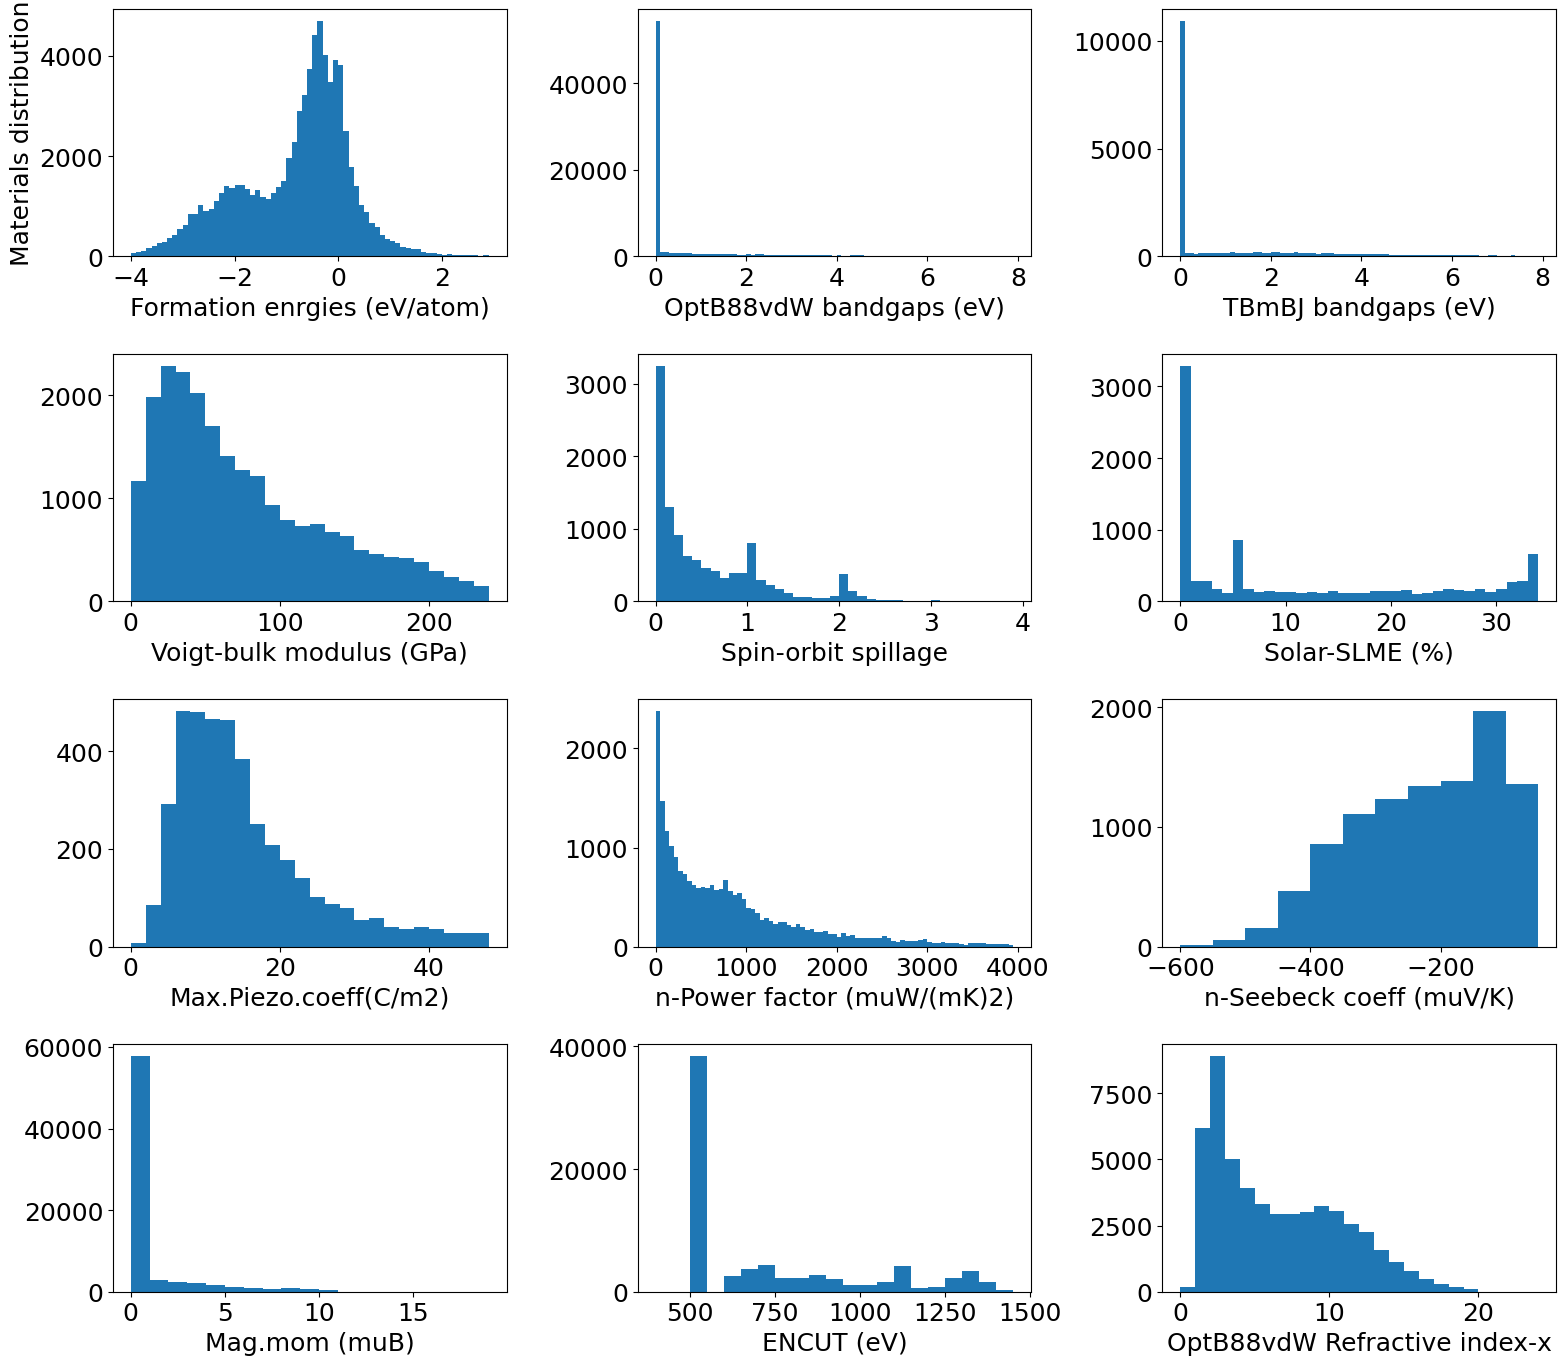

In [9]:
# Now let's make a histogram for some of the material-properties in the dataset
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

the_grid = GridSpec(4, 3)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,14))

plt.subplot(the_grid[0, 0])
val=np.array(df['formation_energy_peratom'].replace('na',np.nan).dropna().values,dtype='float')

plt.hist(val,bins=np.arange(-4,3,.1))
plt.xlabel('Formation enrgies (eV/atom)')
plt.ylabel('Materials distribution')

plt.subplot(the_grid[0, 1])
val=np.array(df['optb88vdw_bandgap'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,8,.1))
plt.xlabel('OptB88vdW bandgaps (eV)')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[0, 2])
val=np.array(df['mbj_bandgap'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,8,.1))
plt.xlabel('TBmBJ bandgaps (eV)')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[1, 0])
val=np.array(df['bulk_modulus_kv'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,250,10))
plt.xlabel('Voigt-bulk modulus (GPa)')
#plt.ylabel('Materials distribution')


plt.subplot(the_grid[1, 1])
val=np.array(df['spillage'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,4,.1))
plt.xlabel('Spin-orbit spillage')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[1, 2])
val=np.array(df['slme'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,35,1))
plt.xlabel('Solar-SLME (%)')
#plt.ylabel('Materials distribution')


plt.subplot(the_grid[2, 0])
val=np.array(df['dfpt_piezo_max_dielectric'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,50,2))
#plt.ylabel('Materials distribution')
plt.xlabel('Max.Piezo.coeff(C/m2)')


plt.subplot(the_grid[2, 1])
val=np.array(df['n-powerfact'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,4000,50))
#plt.ylabel('Materials distribution')
plt.xlabel('n-Power factor (muW/(mK)2)')

plt.subplot(the_grid[2, 2])
val=np.array(df['n-Seebeck'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(-600,0,50))
#plt.ylabel('Materials distribution')
plt.xlabel('n-Seebeck coeff (muV/K)')


plt.subplot(the_grid[3, 0])
val=np.array(df['magmom_oszicar'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,20,1))
#plt.ylabel('Materials distribution')
plt.xlabel('Mag.mom (muB)')


plt.subplot(the_grid[3, 1])
val=np.array(df['encut'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(400,1500,50))
#plt.ylabel('Materials distribution')
plt.xlabel('ENCUT (eV)')



plt.subplot(the_grid[3, 2])
val=np.sqrt(np.array(df['epsx'].replace('na',np.nan).dropna().values,dtype='float'))
plt.hist(val,bins=np.arange(0,25,1))
#plt.ylabel('Materials distribution')
plt.xlabel('OptB88vdW Refractive index-x')

plt.tight_layout()

<ipython-input-10-1818bde56f4c>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val=np.array(df['Tc_supercon'].replace('na',np.nan).dropna().values,dtype='float')
<ipython-input-10-1818bde56f4c>:32: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val=np.array(df['max_efg'].replace('na',np.nan).dropna().values,dtype='float')


Crystal systems Index(['cubic', 'hexagonal', 'monoclinic', 'orthorhombic', 'tetragonal',
       'triclinic', 'trigonal'],
      dtype='object')


<ipython-input-10-1818bde56f4c>:55: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val=np.array(df['max_ir_mode'].replace('na',np.nan).dropna().values,dtype='float')
<ipython-input-10-1818bde56f4c>:62: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val=np.array(df['min_ir_mode'].replace('na',np.nan).dropna().values,dtype='float')
<ipython-input-10-1818bde56f4c>:68: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(

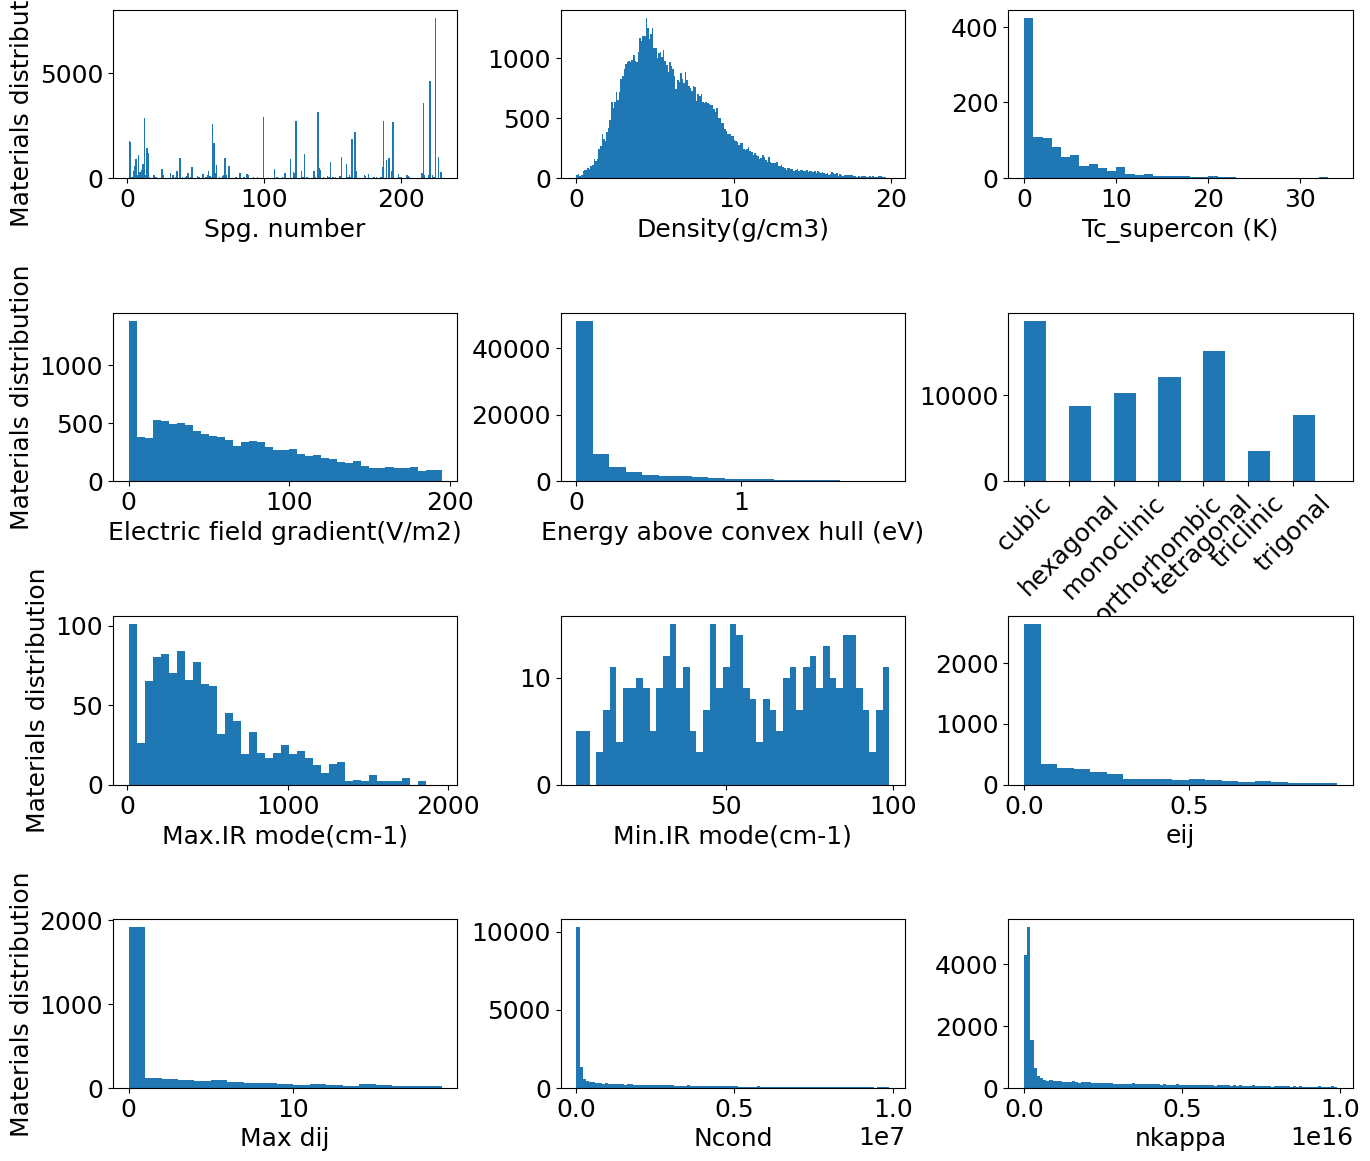

In [10]:
# Few more properties
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

the_grid = GridSpec(4, 3,hspace=0.8,wspace=0.3)
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16,14))

plt.subplot(the_grid[0, 0])
val=np.array(df['spg'].replace('na',np.nan).dropna().values,dtype='int')
plt.hist(val,bins=np.arange(1,231,1))
plt.xlabel('Spg. number')
plt.ylabel('Materials distribution')

plt.subplot(the_grid[0, 1])
val=np.array(df['density'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,20,.1))
plt.xlabel('Density(g/cm3)')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[0, 2])
val=np.array(df['Tc_supercon'].replace('na',np.nan).dropna().values,dtype='float')
#val=np.array(df['slme'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,35,1))
#plt.xlabel('SLME')
plt.xlabel('Tc_supercon (K)')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[1, 0])
val=np.array(df['max_efg'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,200,5))
plt.xlabel('Electric field gradient(V/m2)')
plt.ylabel('Materials distribution')


plt.subplot(the_grid[1, 1])
val=np.array(df['ehull'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,2,.1))
plt.xlabel('Energy above convex hull (eV)')
#plt.ylabel('Materials distribution')

plt.subplot(the_grid[1, 2])
crys = pd.Categorical(df.crys)
print ('Crystal systems',crys.categories)
val=np.array(crys.codes,dtype='int')
plt.hist(val,bins=np.arange(0,8,1),width=.5)
plt.xticks([0,1,2,3,4,5,6],crys.categories.values,rotation=45)
plt.xlabel('Crystal systems')
#plt.ylabel('Materials distribution')


plt.subplot(the_grid[2, 0])
val=np.array(df['max_ir_mode'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(10,2000,50))
plt.ylabel('Materials distribution')
plt.xlabel('Max.IR mode(cm-1)')


plt.subplot(the_grid[2, 1])
val=np.array(df['min_ir_mode'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(5,100,2))
#plt.ylabel('Materials distribution')
plt.xlabel('Min.IR mode(cm-1)')

plt.subplot(the_grid[2, 2])
val=np.array(df['dfpt_piezo_max_eij'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,1,.05))
#plt.ylabel('Materials distribution')
plt.xlabel('eij')


plt.subplot(the_grid[3, 0])
val=np.array(df['dfpt_piezo_max_dij'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,20,1))
plt.ylabel('Materials distribution')
plt.xlabel('Max dij')


plt.subplot(the_grid[3, 1])
val=df['ncond'].replace('na',np.nan).dropna().values
plt.hist(val,bins=np.arange(10,1e7,1e5))
#plt.ylabel('Materials distribution')
plt.xlabel('Ncond')



plt.subplot(the_grid[3, 2])
val=df['nkappa'].replace('na',np.nan).dropna().values
plt.hist(val,bins=np.arange(10,1e16,1e14))
#plt.ylabel('Materials distribution')
plt.xlabel('nkappa')
plt.tight_layout()

<ipython-input-11-fc219b7bb641>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2=df[['optb88vdw_bandgap','mbj_bandgap']].replace('na',np.nan).dropna()


Mats. with both OptB88vdW bandgaps 75993
Mats. with both TBmBJ abd OptB88vdW bandgaps 19805


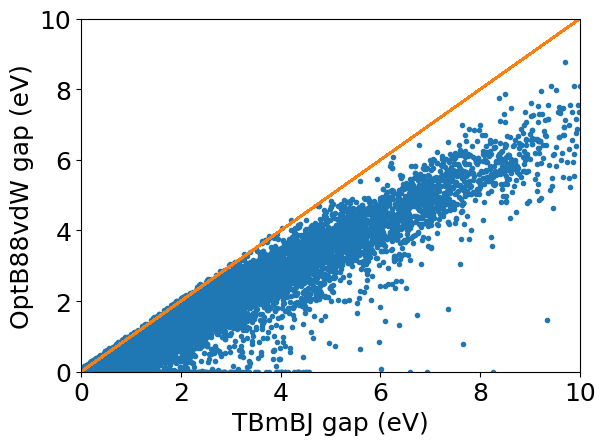

In [11]:
# Let's compare OptB88vdW and TBmBJ bandgaps
df2=df[['optb88vdw_bandgap','mbj_bandgap']].replace('na',np.nan).dropna()
plt.plot(df2['mbj_bandgap'], df2['optb88vdw_bandgap'],'.')
plt.plot(df2['mbj_bandgap'], df2['mbj_bandgap'])
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('TBmBJ gap (eV)')
plt.ylabel('OptB88vdW gap (eV)')
plt.tight_layout()
print ('Mats. with both OptB88vdW bandgaps', len(df['optb88vdw_bandgap']))
print ('Mats. with both TBmBJ abd OptB88vdW bandgaps', len(df2['mbj_bandgap']))

### Material-screening example: Let's find materials which has Bi element, has spin-orbit spillage >= 0.5, have OptB88vdW bandgaps > 0.1, energy above convex hull < 0.1 eV/atom , have SLME >5 %

In [12]:
df3 = df[['optb88vdw_bandgap','spillage', 'ehull', 'slme', 'atoms', 'jid']].replace('na',np.nan).dropna()

<ipython-input-12-c9a2351d6a13>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3 = df[['optb88vdw_bandgap','spillage', 'ehull', 'slme', 'atoms', 'jid']].replace('na',np.nan).dropna()


In [13]:
from jarvis.core.atoms import Atoms
def has_element(atoms_dict = {}, my_element = 'Bi'):
    atoms = Atoms.from_dict(atoms_dict)
    elements = atoms.elements
    if my_element in elements:
        return True
    else:
        return np.nan

df3['el'] = df3['atoms'].apply(lambda x: has_element(atoms_dict = x, my_element = 'Bi'))
df3['formula'] = df3['atoms'].apply(lambda x: Atoms.from_dict(x).composition.reduced_formula)

In [14]:
df4 = df3.dropna()

In [15]:
df4[(df4['optb88vdw_bandgap'] >= .1) & (df4['spillage'] >=.5 ) & (df4['ehull'] <=.1 ) & (df4['slme'] >=5 )  ]

,optb88vdw_bandgap,spillage,ehull,slme,atoms,jid,el,formula
4686,0.504,2.022,0.0000,31.11,"{'lattice_mat': [[0.0, 3.485394766378691, 3.48...",JVASP-22724,True,NaLi2Bi
11718,0.456,2.040,0.0000,25.50,"{'lattice_mat': [[4.42505744378599, 0.02032676...",JVASP-2023,True,TlBiTe2
18483,0.253,2.036,0.0000,23.24,"{'lattice_mat': [[4.147199364915584, 0.0037305...",JVASP-2062,True,TlBiSe2
22951,0.634,2.072,0.0000,33.83,"{'lattice_mat': [[2.3842715689309357, -4.12967...",JVASP-4050,True,CaMg2Bi2
23026,0.596,2.075,0.0000,33.83,"{'lattice_mat': [[2.4528938053008145, -4.24853...",JVASP-4053,True,BaMg2Bi2
23867,0.757,0.665,0.0494,29.20,"{'lattice_mat': [[8.385213942934797, 7.1608399...",JVASP-8817,True,NaBiSe2
24890,0.534,2.019,0.0000,33.43,"{'lattice_mat': [[4.172273561810926, -1.864909...",JVASP-22657,True,LiMgBi
25554,0.985,0.755,0.0252,33.83,"{'lattice_mat': [[4.1670203186750125, 0.0, 0.0...",JVASP-5215,True,Bi2Se3
28095,0.820,0.638,0.0200,31.99,"{'lattice_mat': [[4.420421720230594, 0.0, 0.0]...",JVASP-32749,True,BiI
30540,0.419,2.040,0.0020,33.44,"{'lattice_mat': [[5.2477952475750245, -3.63754...",JVASP-56110,True,K3Bi


### Find all cubic materials

In [16]:
df.columns

Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'Tc_supercon', 'dimensionality',
       'efg', 'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys',
       'density', 'poisson', 'raw_files', 'nat', 'bulk_modulus_kv',
       'shear_modulus_gv', 'mbj_bandgap', 'hse_ga

In [17]:
# from jarvis.analysis.structure.spacegroup import Spacegroup3D
# # Takes some time because we are running spacegroup analysis on all the materials
# def crystal_system(atoms_dict={}):
#     atoms = Atoms.from_dict(atoms_dict)
#     system = Spacegroup3D(Atoms.from_dict(atoms_dict)).crystal_system
#     return system
# df['crystal_system'] = df['atoms'].apply(lambda x: crystal_system(atoms_dict = x))

In [18]:
len(df[df['crys']=='cubic'])

18607

In [ ]:
# We can store the screened materials in a new json file
# Note that the primitive cell can have non-equal lattice-constants but not the conventional cell
from jarvis.db.jsonutils import dumpjson
dumpjson(data = df[df['crys']=='cubic']['atoms'].values.tolist(), filename='all_cubic.json')

### Working with 2D dataset

In [ ]:
df_2d=pd.DataFrame(dft_2d)

In [ ]:
df_2d.columns

Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'Tc_supercon', 'dimensionality',
       'efg', 'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys',
       'density', 'poisson', 'raw_files', 'nat', 'bulk_modulus_kv',
       'shear_modulus_gv', 'mbj_bandgap', 'hse_ga

Text(0.5, 0, 'Exfoliation energy (eV)')

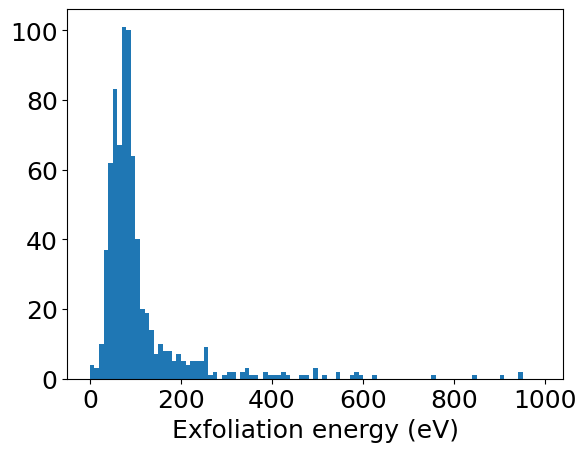

In [ ]:
val=np.array(df_2d['exfoliation_energy'].replace('na',np.nan).dropna().values,dtype='float')
plt.hist(val,bins=np.arange(0,1000,10))
#plt.ylabel('Materials distribution')
plt.xlabel('Exfoliation energy (eV)')

In [ ]:
#Let's find exfoliable 2D materials with magnetic moment>0.5 muB , optb88vdw_bandgap > 0.05 and exfoliation_energy < 200

In [ ]:
df_2d_a = df_2d[['atoms', 'optb88vdw_bandgap','exfoliation_energy', 'magmom_oszicar','jid']].replace('na',np.nan).dropna()

In [ ]:
df_2d_a['formula'] = df_2d_a['atoms'].apply(lambda x: Atoms.from_dict(x).composition.reduced_formula)

In [ ]:
df_2d_a[(df_2d_a['optb88vdw_bandgap'] >= .05) & (df_2d_a['exfoliation_energy'] <200 ) & (df_2d_a['magmom_oszicar'] >=.5  )  ]

,atoms,optb88vdw_bandgap,exfoliation_energy,magmom_oszicar,jid,formula
15,"{'lattice_mat': [[3.4493232148119026, -5.97440...",0.405,89.48,5.988,JVASP-60389,CrGeTe3
46,"{'lattice_mat': [[-5.449213470871349, -3.62926...",0.774,72.20,5.999,JVASP-60392,CrPS4
119,"{'lattice_mat': [[3.1825586772463623, 0.0, 0.0...",0.536,98.10,5.999,JVASP-75319,LiVF3
123,"{'lattice_mat': [[5.825064631761128, 1.9232331...",0.106,57.94,0.938,JVASP-75320,Co3TeO8
143,"{'lattice_mat': [[3.2651579585109913, -8.59494...",0.679,54.87,4.000,JVASP-75331,VOF
150,"{'lattice_mat': [[4.585681019269083, 1.5713669...",1.729,124.62,5.000,JVASP-75350,LiFeF4
154,"{'lattice_mat': [[3.6393088883325624, 8.317665...",0.460,54.79,1.969,JVASP-75357,NiC2S2N2
159,"{'lattice_mat': [[6.058153846304347, 0.0, 0.0]...",0.248,66.61,9.892,JVASP-75361,MnPS3
174,"{'lattice_mat': [[3.1979506617490285, 0.0, 0.0...",0.584,38.93,6.000,JVASP-27906,CrClO
179,"{'lattice_mat': [[6.164775515828787, -6.053545...",0.649,163.74,1.984,JVASP-75065,YbCl3
